In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc, confusion_matrix
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
import seaborn as sns


In [3]:
data = pd.read_csv('seattle-weather.csv')
data = data.set_index('date')

In [4]:
data.head()

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain


In [5]:
X_new = data.drop('weather', axis=1)
Y_new = data['weather']

In [6]:
#MinMaxScaling
X = (X_new - X_new.min()) / (X_new.max() - X_new.min())
X

,precipitation,temp_max,temp_min,wind
date,,,,
2012-01-01,0.000000,0.387097,0.476378,0.472527
2012-01-02,0.194991,0.327957,0.389764,0.450549
2012-01-03,0.014311,0.357527,0.562992,0.208791
2012-01-04,0.363148,0.370968,0.500000,0.472527
2012-01-05,0.023256,0.282258,0.389764,0.626374
...,...,...,...,...
2015-12-27,0.153846,0.161290,0.346457,0.274725
2015-12-28,0.026834,0.177419,0.346457,0.098901
2015-12-29,0.000000,0.236559,0.303150,0.241758


In [7]:
le = LabelEncoder()
Y = le.fit_transform(Y_new)
Y

array([0, 2, 2, ..., 1, 4, 4])

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [9]:
X_train.head()

,precipitation,temp_max,temp_min,wind
date,,,,
2014-12-02,0.000000,0.193548,0.153543,0.582418
2013-09-30,0.330948,0.416667,0.673228,0.648352
2014-03-10,0.336315,0.370968,0.519685,0.197802
2013-01-15,0.000000,0.223118,0.255906,0.208791
2012-10-30,0.617174,0.446237,0.759843,0.263736


In [10]:
Y_train

array([1, 2, 2, ..., 2, 4, 1])

In [11]:
#Linear Kernel
linear = SVC(kernel='linear')
linear.fit(X_train, Y_train)

Y_pred = linear.predict(X_test)

linear_accuracy = accuracy_score(Y_test, Y_pred)
print(f'Accuracy: {linear_accuracy:.2f}')

Accuracy: 0.73


In [12]:
#Polynomial Kernel
polynomial = SVC(kernel='poly')
polynomial.fit(X_train, Y_train)

Y_pred = polynomial.predict(X_test)

polynomial_accuracy = accuracy_score(Y_test, Y_pred)
print(f'Accuracy: {polynomial_accuracy:.2f}')

Accuracy: 0.77


In [13]:
#RBF Kernel
rbf = SVC(kernel='rbf')
rbf.fit(X_train, Y_train)

Y_pred = rbf.predict(X_test)

rbf_accuracy = accuracy_score(Y_test, Y_pred)
print(f'Accuracy: {rbf_accuracy:.2f}')

Accuracy: 0.75


In [14]:
#Sigmoid Kernel
sigmoid = SVC(kernel='sigmoid')
sigmoid.fit(X_train, Y_train)

Y_pred = sigmoid.predict(X_test)

sigmoid_accuracy = accuracy_score(Y_test, Y_pred)
print(f'Accuracy: {sigmoid_accuracy:.2f}')

Accuracy: 0.31


In [15]:
print(f'Accuracy of linear kernel: {linear_accuracy:.2f}')
print(f'Accuracy of Polynomial kernel: {polynomial_accuracy:.2f}')
print(f'Accuracy of rbf kernel: {rbf_accuracy:.2f}')
print(f'Accuracy of sigmoid kernel: {sigmoid_accuracy:.2f}')

Accuracy of linear kernel: 0.73
Accuracy of Polynomial kernel: 0.77
Accuracy of rbf kernel: 0.75
Accuracy of sigmoid kernel: 0.31


In [16]:
data['weather'].unique()

array(['drizzle', 'rain', 'sun', 'snow', 'fog'], dtype=object)

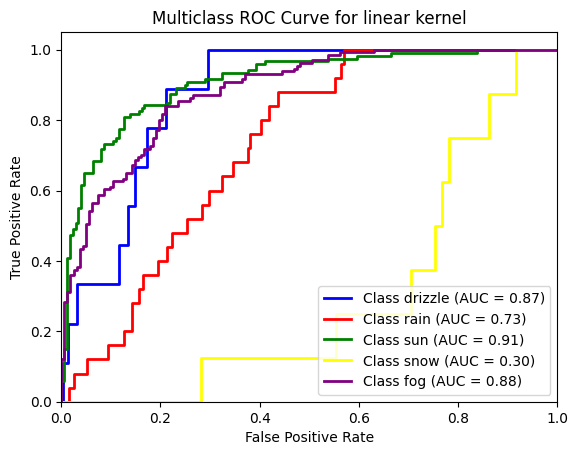

In [17]:
#Linear Kernel
Y_bin = label_binarize(Y_test, classes=[0,1,2,3,4])
svm = OneVsRestClassifier(SVC(kernel='linear'))
svm.fit(X_train, Y_train)

Y_score = svm.decision_function(X_test)

fpr, tpr, roc_auc = {}, {}, {}
n_classes = (len(Y_bin[0]))

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_bin[:, i], Y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
colors = ['blue', 'red', 'green', 'yellow', 'purple'] 
classes = ['drizzle', 'rain', 'sun', 'snow', 'fog']
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2, label=f'Class {classes[i]} (AUC = {roc_auc[i]:.2f})')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve for linear kernel')
plt.legend(loc="lower right")
plt.show()

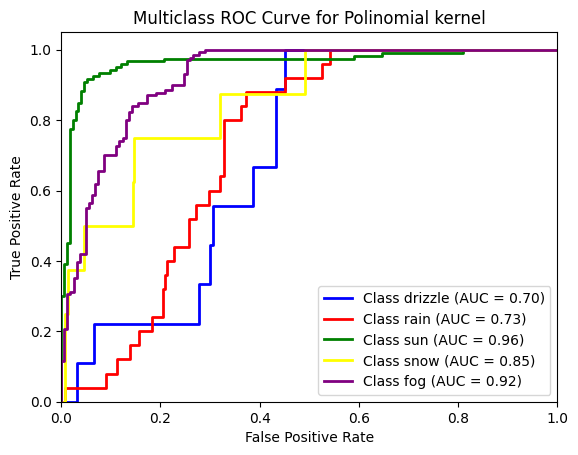

In [18]:
#Polynomial Kernel
Y_bin = label_binarize(Y_test, classes=[0,1,2,3,4])
svm = OneVsRestClassifier(SVC(kernel='poly'))
svm.fit(X_train, Y_train)

Y_score = svm.decision_function(X_test)

fpr, tpr, roc_auc = {}, {}, {}
n_classes = (len(Y_bin[0]))

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_bin[:, i], Y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
colors = ['blue', 'red', 'green', 'yellow', 'purple'] 
classes = ['drizzle', 'rain', 'sun', 'snow', 'fog']
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2, label=f'Class {classes[i]} (AUC = {roc_auc[i]:.2f})')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve for Polinomial kernel')
plt.legend(loc="lower right")
plt.show()

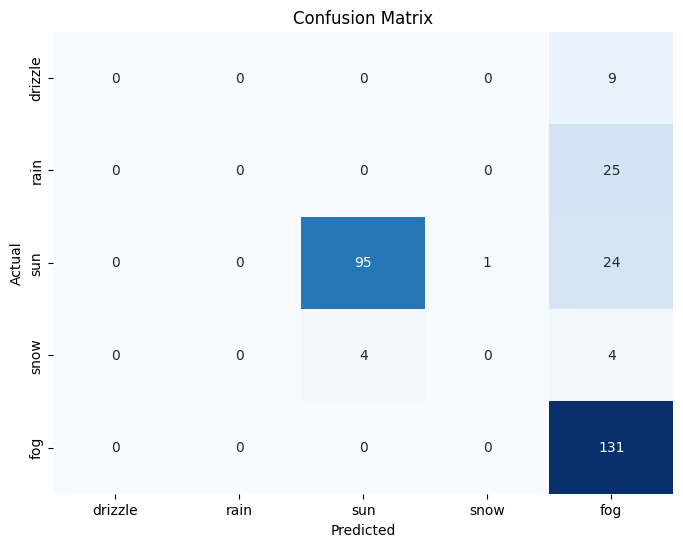

In [19]:
#Confusion matrix
Y_pred = polynomial.predict(X_test)
conf_matrix = confusion_matrix(Y_test, Y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['drizzle', 'rain', 'sun', 'snow', 'fog'] , yticklabels=['drizzle', 'rain', 'sun', 'snow', 'fog'] )
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [25]:
parameters_dictionary = {'estimator__kernel': ['linear', 'rbf', 'poly'],
                        'estimator__C': [0.0001, 0.1],
                        'estimator__gamma': [1, 'scale', 'auto']}
svc = OneVsRestClassifier(SVC())

grid_search = GridSearchCV(estimator=svc, param_grid=parameters_dictionary, cv=2, scoring='accuracy')
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=2, estimator=OneVsRestClassifier(estimator=SVC()),
             param_grid={'estimator__C': [0.0001, 0.1],
                         'estimator__gamma': [1, 'scale', 'auto'],
                         'estimator__kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy')

In [26]:
results = grid_search.cv_results_
param_combinations = results['params']

for params in param_combinations:
    for key in list(params.keys()):
        if key.startswith('estimator__'):
            new_key = key.replace('estimator__', '')
            params[new_key] = params.pop(key)

df = pd.DataFrame({
    'Hyperparameters': param_combinations,
    'Mean Fit Time': results['mean_fit_time'],
    'Mean Score Time': results['mean_score_time']
})

In [27]:
df

,Hyperparameters,Mean Fit Time,Mean Score Time
0,"{'C': 0.0001, 'gamma': 1, 'kernel': 'linear'}",0.044811,0.027136
1,"{'C': 0.0001, 'gamma': 1, 'kernel': 'rbf'}",0.056509,0.104782
2,"{'C': 0.0001, 'gamma': 1, 'kernel': 'poly'}",0.036699,0.032679
3,"{'C': 0.0001, 'gamma': 'scale', 'kernel': 'lin...",0.036404,0.027154
4,"{'C': 0.0001, 'gamma': 'scale', 'kernel': 'rbf'}",0.048444,0.099101
5,"{'C': 0.0001, 'gamma': 'scale', 'kernel': 'poly'}",0.044203,0.032157
6,"{'C': 0.0001, 'gamma': 'auto', 'kernel': 'line...",0.040714,0.029487
7,"{'C': 0.0001, 'gamma': 'auto', 'kernel': 'rbf'}",0.050360,0.098720
8,"{'C': 0.0001, 'gamma': 'auto', 'kernel': 'poly'}",0.037743,0.027568
9,"{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}",0.037766,0.026232
